In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [3]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
numerical_data = df.select_dtypes(include=["object", "category"])
for x in numerical_data:
  df[x].fillna(df[x].mode()[0], inplace= True)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [7]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
  df[x]=encoder.fit_transform(df[x])

In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [14]:
X = df.drop(["class"], axis=1)
y = df["class"]

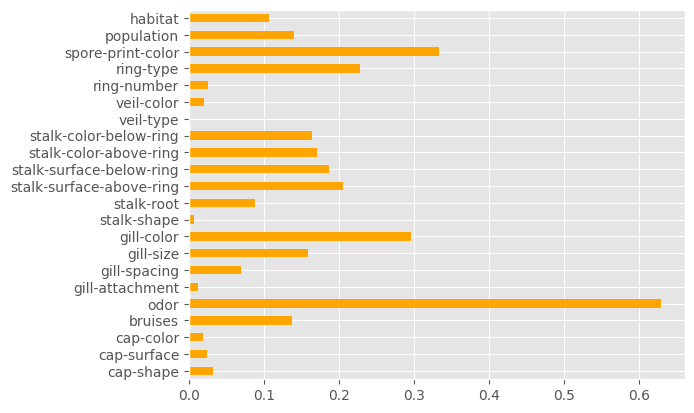

In [15]:
from sklearn.feature_selection import mutual_info_classif
plt.style.use("ggplot")
importance = mutual_info_classif(X,y)
feature_impo = pd.Series(importance,X.columns[0:len(X.columns)])
feature_impo.plot(kind="barh", color="orange")
plt.show()

In [17]:
X = X.drop(["veil-type", "stalk-shape", "gill-attachment",], axis=1)

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.20, random_state=1)

In [21]:
from sklearn.pipeline import Pipeline
LinearModel = Pipeline([("scalar", StandardScaler()),("classifier",DecisionTreeClassifier())])
LinearModel.fit(xtrain, ytrain)

Pipeline(steps=[('scalar', StandardScaler()),
                ('classifier', DecisionTreeClassifier())])

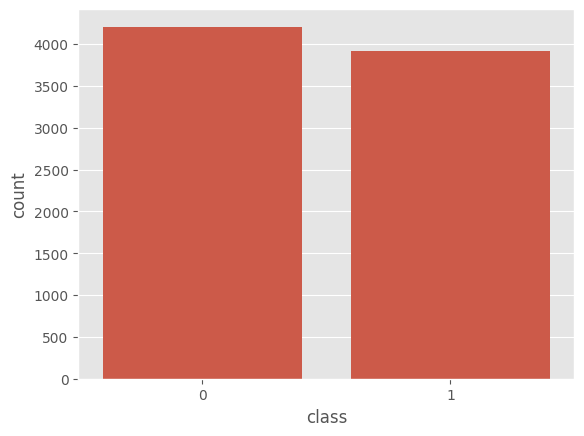

In [22]:
sns.countplot(x="class", data=df)
plt.show()

In [24]:
pred = LinearModel.predict(xtest)
pred

array([0, 1, 1, ..., 1, 0, 0])

In [25]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<Axes: >

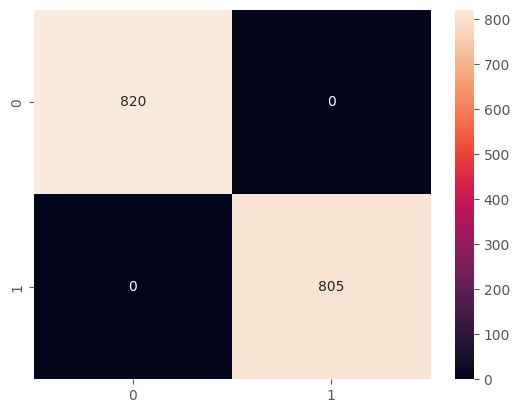

In [26]:
cm = confusion_matrix(ytest,pred)
sns.heatmap(cm,annot=True,fmt="0.9g")

In [27]:
outcome={
  "Actual class":ytest,
  "predicted class":pred
}

df_classification = pd.DataFrame(outcome)
df_classification.head()

,Actual class,predicted class
1392,0,0
4051,1,1
3725,1,1
7177,1,1
103,0,0
